In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving churn_data.csv to churn_data.csv


In [ ]:
# Load the customer churn dataset
df = pd.read_csv("churn_data.csv")

# Preview the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check dataset size
df.shape

(7043, 21)

In [ ]:
# Review column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data Cleaning
# Convert TotalCharges from text to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with missing values
df.dropna(inplace=True)

# Encode churn as binary for analysis
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Statistical summary/overview of numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
# Calculate overall churn percentage
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.58%


In [ ]:
# Group customers based on length of relationship
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years']
)

/tmp/ipython-input-1141845555.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].mean().reset_index()


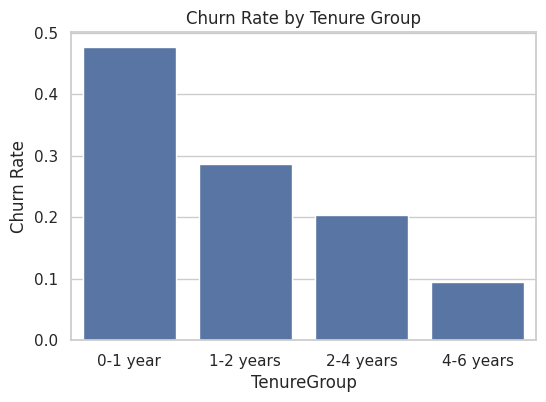

In [ ]:
# Calculate churn rate per tenure group
tenure_churn = df.groupby('TenureGroup')['Churn'].mean().reset_index()

# Visualize churn trends across tenure groups
plt.figure(figsize=(6,4))
sns.barplot(x='TenureGroup', y='Churn', data=tenure_churn)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

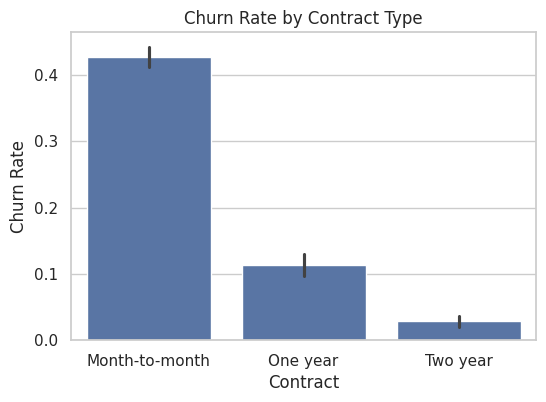

In [ ]:
# Compare churn across different contract types
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

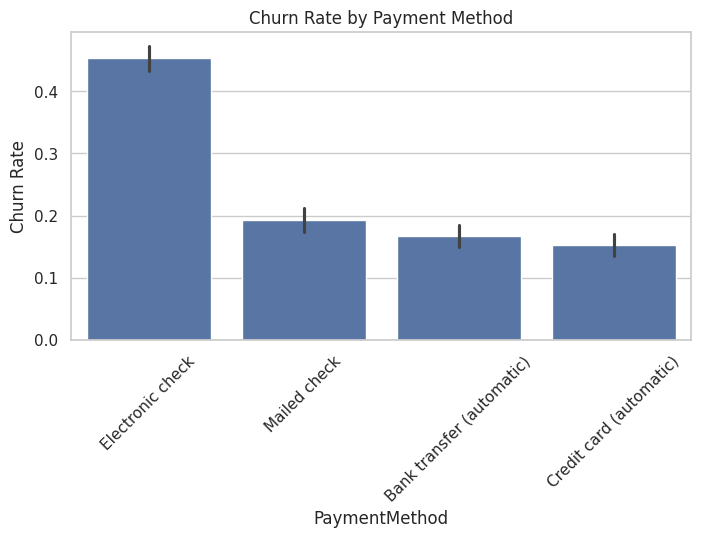

In [ ]:
# Analyze churn behavior by payment method
plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.show()

In [ ]:
# Revenue Impact Analysis
# Estimate revenue contribution from churned customers
revenue_lost = df[df['Churn'] == 1]['MonthlyCharges'].sum()
total_revenue = df['MonthlyCharges'].sum()

print(f"Revenue loss due to churn: {(revenue_lost / total_revenue) * 100:.2f}%")

Revenue loss due to churn: 30.53%


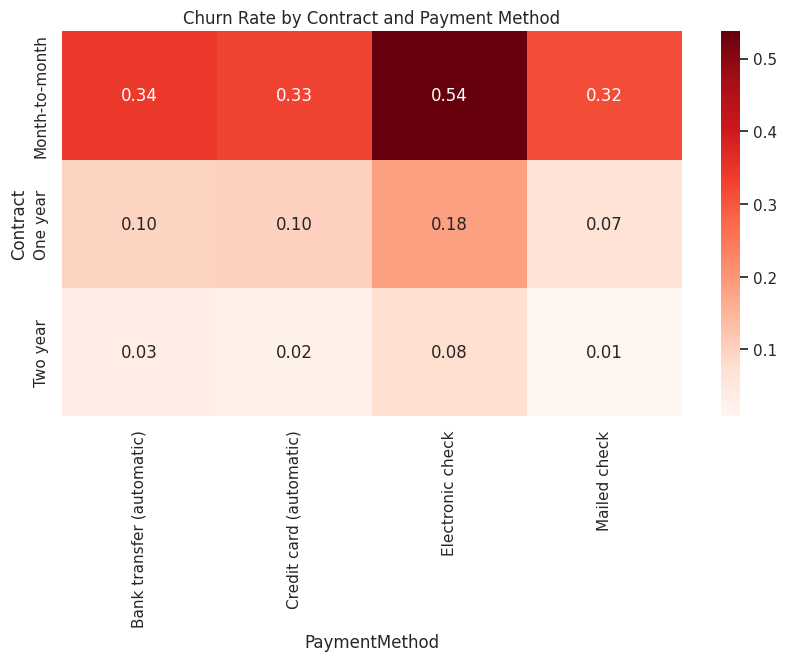

In [ ]:
# Contract and Payment Interaction
# Create pivot table to study combined impact
pivot_table = pd.pivot_table(
    df,
    values='Churn',
    index='Contract',
    columns='PaymentMethod',
    aggfunc='mean'
)

# Visualize high-risk combinations
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Reds")
plt.title("Churn Rate by Contract and Payment Method")
plt.show()

In [ ]:
# Segment customers based on risk and value
def segment_customer(row):
    if row['tenure'] < 12 and row['Churn'] == 1:
        return "High-Risk New Customer"
    elif row['tenure'] >= 36 and row['Churn'] == 0:
        return "Loyal Customer"
    elif row['MonthlyCharges'] > 80:
        return "High-Value Customer"
    else:
        return "Standard Customer"

df['CustomerSegment'] = df.apply(segment_customer, axis=1)

# Distribution of customer segments
df['CustomerSegment'].value_counts()

,count
CustomerSegment,
Loyal Customer,2683
Standard Customer,2263
High-Value Customer,1087
High-Risk New Customer,999


In [ ]:
# Statistical Validation
# Compare monthly charges between churned and non-churned customers
from scipy.stats import ttest_ind

churned = df[df['Churn'] == 1]['MonthlyCharges']
non_churned = df[df['Churn'] == 0]['MonthlyCharges']

t_stat, p_value = ttest_ind(churned, non_churned)
print("P-value:", p_value)

P-value: 6.760843117980302e-60


In [ ]:
### Interpretable Churn Prediction Model

In [ ]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
df_model = df.copy()

# Drop non-model columns
df_model.drop(['customerID', 'TenureGroup', 'CustomerSegment'], axis=1, inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Split features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Scale numerical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_cols)],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# -------- THRESHOLD OPTIMIZATION --------
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import numpy as np

y_prob = model.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.30, 0.61, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_threshold = thresholds[np.argmax(f1_scores)]
y_pred = (y_prob >= best_threshold).astype(int)

print("Best Threshold:", best_threshold)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Best Threshold: 0.5999999999999999
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1291
           1       0.54      0.73      0.62       467

    accuracy                           0.77      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.77      0.78      1758

ROC AUC Score: 0.8371554345103724


In [ ]:
import pandas as pd
import numpy as np

# Extract feature names and learned coefficients from the trained model
feature_names = X.columns
coefficients = model.coef_[0]

# Combine them to understand which features influence churn the most
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display top features contributing to churn prediction
feature_importance.head(10)

# Positive coefficients increase the likelihood of churn, while negative values reduce it.

,Feature,Coefficient
17,MonthlyCharges,0.699972
18,TotalCharges,0.562720
7,InternetService,0.166207
15,PaperlessBilling,0.155802
16,PaymentMethod,0.084431
1,SeniorCitizen,0.079106
6,MultipleLines,0.074297
12,StreamingTV,0.015801
2,Partner,0.011634
13,StreamingMovies,-0.000234


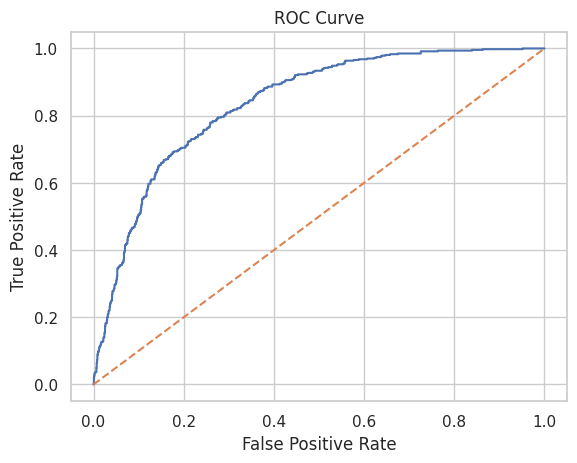

In [ ]:
# ROC Curve – Model Performance Visualization

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

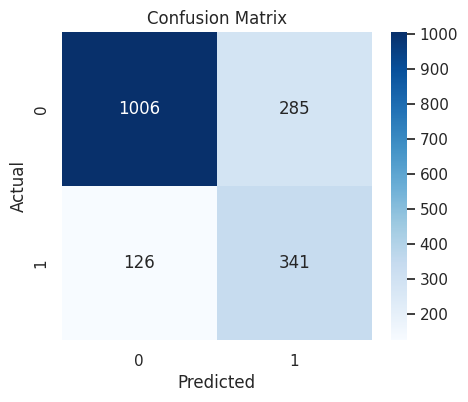

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix using actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix for better interpretation
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

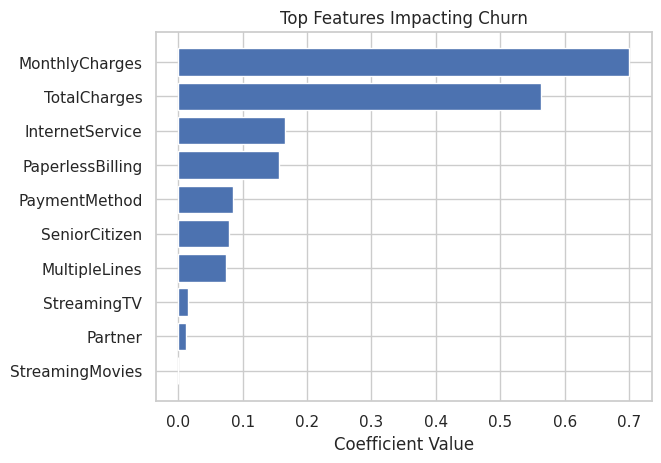

In [ ]:
# Top Features Influencing Churn

# Select top 10 most influential features
top_features = feature_importance.head(10)

plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top Features Impacting Churn")
plt.gca().invert_yaxis()
plt.show()

# Higher absolute coefficient values indicate stronger influence on churn prediction.

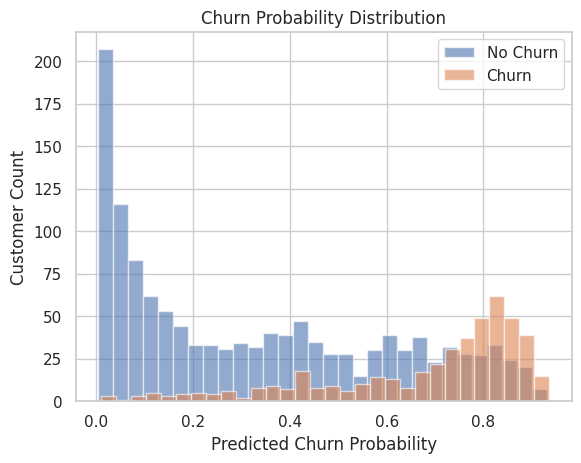

In [ ]:
# Predicted Churn Probability Distribution

# Plot probability distribution for churn vs non-churn customers
plt.hist(y_prob[y_test == 0], bins=30, alpha=0.6, label='No Churn')
plt.hist(y_prob[y_test == 1], bins=30, alpha=0.6, label='Churn')

plt.xlabel("Predicted Churn Probability")
plt.ylabel("Customer Count")
plt.title("Churn Probability Distribution")
plt.legend()
plt.show()